In [1]:
import pandas as pd
from sklearn.model_selection import StratifiedShuffleSplit
from scipy.stats import skew
from tqdm import tqdm
import matplotlib.pyplot as plt

In [16]:
df = pd.read_csv("C:\datasets/diabetes.csv", index_col=0)
df

,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
Pregnancies,,,,,,,,
6,148,72,35,0,33.6,0.627,50,1
1,85,66,29,0,26.6,0.351,31,0
8,183,64,0,0,23.3,0.672,32,1
1,89,66,23,94,28.1,0.167,21,0
0,137,40,35,168,43.1,2.288,33,1
...,...,...,...,...,...,...,...,...
10,101,76,48,180,32.9,0.171,63,0
2,122,70,27,0,36.8,0.340,27,0
5,121,72,23,112,26.2,0.245,30,0


In [17]:
df.columns

Index(['Glucose', 'BloodPressure', 'SkinThickness', 'Insulin', 'BMI',
       'DiabetesPedigreeFunction', 'Age', 'Outcome'],
      dtype='object')

In [18]:
#결측치 확인
df.isnull().sum()

Glucose                     0
BloodPressure               0
SkinThickness               0
Insulin                     0
BMI                         0
DiabetesPedigreeFunction    0
Age                         0
Outcome                     0
dtype: int64

In [19]:
# 결측치 제거
df = df.dropna()
df.isnull().sum()

Glucose                     0
BloodPressure               0
SkinThickness               0
Insulin                     0
BMI                         0
DiabetesPedigreeFunction    0
Age                         0
Outcome                     0
dtype: int64

In [20]:
# 레이블 갯수 확인 (숫자)
df['Outcome'].value_counts()

0    500
1    268
Name: Outcome, dtype: int64

In [21]:
X = df.drop("Outcome", axis =1)
X

,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age
Pregnancies,,,,,,,
6,148,72,35,0,33.6,0.627,50
1,85,66,29,0,26.6,0.351,31
8,183,64,0,0,23.3,0.672,32
1,89,66,23,94,28.1,0.167,21
0,137,40,35,168,43.1,2.288,33
...,...,...,...,...,...,...,...
10,101,76,48,180,32.9,0.171,63
2,122,70,27,0,36.8,0.340,27
5,121,72,23,112,26.2,0.245,30


In [22]:
y = df["Outcome"]
y

Pregnancies
6     1
1     0
8     1
1     0
0     1
     ..
10    0
2     0
5     0
1     1
1     0
Name: Outcome, Length: 768, dtype: int64

PCA(주성분 분석)는 연속형(수치형) 데이터에 대해 작동하는 기법입니다. 따라서 PCA를 적용하려면 입력 변수인 X가 수치형이어야 합니다. 만약 X에 범주형(카테고리) 데이터가 포함되어 있다면, PCA를 수행하기 전에 인코딩을 통해 범주형 데이터를 수치형 데이터로 변환해야 합니다.

Explained variance ratio:  [0.88920966 0.06160576 0.02579683 0.01306647]
원래 데이터의 차원:  (768, 7)
차원 축소 후 데이터의 차원:  (768, 4)


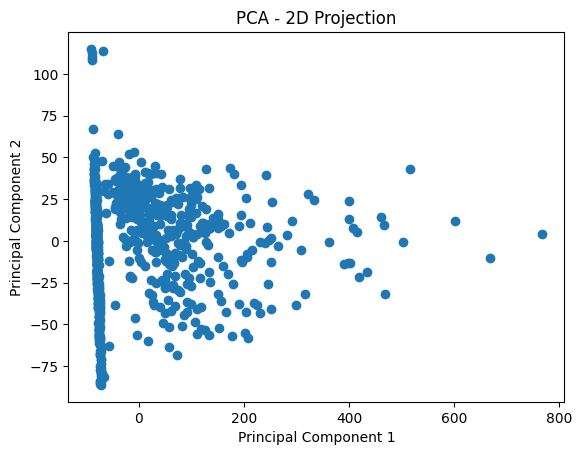

In [23]:
# 필요한 라이브러리 불러오기
import numpy as np
from sklearn.decomposition import PCA
import matplotlib.pyplot as plt

# PCA 객체 생성
pca = PCA(n_components=4)

#PCA 학습
X_reduced = pca.fit_transform(X)

print("Explained variance ratio: ", pca.explained_variance_ratio_)

# 5. 결과 확인
print("원래 데이터의 차원: ", X.shape)  
print("차원 축소 후 데이터의 차원: ", X_reduced.shape) 

# 차원 축소된 데이터 시각화
plt.scatter(X_reduced[:, 0], X_reduced[:, 1])
plt.title('PCA - 2D Projection')
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')
plt.show()